## Problem3

Data of various countries and the factors affecting their life expectancy has been recorded over the past few decades. An analytics firm would like to know how it varies country wise and what factors are influential. Use your skills to analyze the data and build a Lasso and Ridge Regression model and summarize the output. Snapshot of the dataset is given below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Life_expectencey_LR.csv',encoding = "ISO-8859-1")

In [4]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness',
       'thinness_yr', 'Income_composition', 'Schooling'],
      dtype='object')

In [7]:
df.dtypes

Country                    object
Year                        int64
Status                     object
Life_expectancy           float64
Adult_Mortality           float64
infant_deaths               int64
Alcohol                   float64
percentage_expenditure    float64
Hepatitis_B               float64
Measles                     int64
BMI                       float64
under_five_deaths           int64
Polio                     float64
Total_expenditure         float64
Diphtheria                float64
HIV_AIDS                  float64
GDP                       float64
Population                float64
thinness                  float64
thinness_yr               float64
Income_composition        float64
Schooling                 float64
dtype: object

In [8]:
df.describe(exclude = ["number"])

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [9]:
df.select_dtypes(include=["object"])

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [10]:
from sklearn.preprocessing import LabelEncoder
# define one hot encoding
encoder = LabelEncoder()
# transform data
df['Country']= encoder.fit_transform(df.Country)
df['Status']= encoder.fit_transform(df.Status)

In [11]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
df.Year.value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

In [13]:
df.dtypes

Country                     int32
Year                        int64
Status                      int32
Life_expectancy           float64
Adult_Mortality           float64
infant_deaths               int64
Alcohol                   float64
percentage_expenditure    float64
Hepatitis_B               float64
Measles                     int64
BMI                       float64
under_five_deaths           int64
Polio                     float64
Total_expenditure         float64
Diphtheria                float64
HIV_AIDS                  float64
GDP                       float64
Population                float64
thinness                  float64
thinness_yr               float64
Income_composition        float64
Schooling                 float64
dtype: object

In [14]:
df[df.duplicated()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling


<AxesSubplot:>

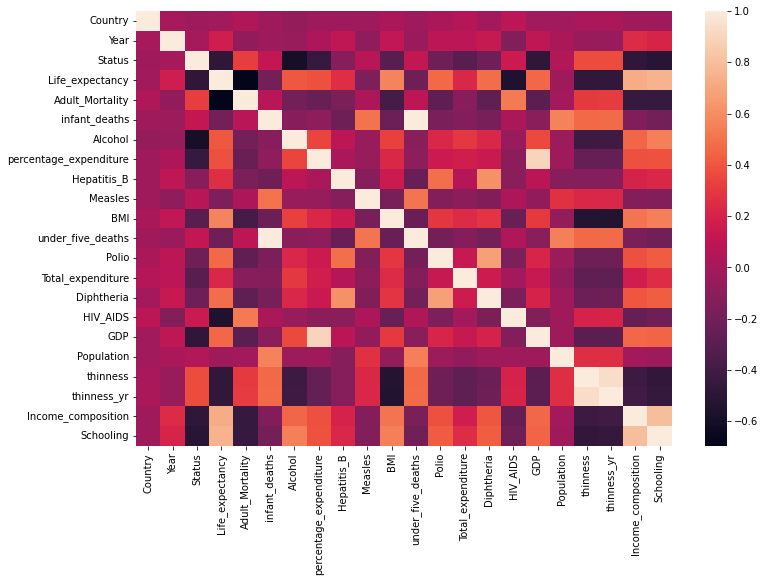

In [15]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.heatmap(df.corr(), annot=False)

Infant deaths and under five deaths are highly correlated. 
GDP and percentage expenditure are highly correlated. 

In [17]:
df.drop('infant_deaths',axis=1,inplace=True)

In [30]:
df.shape

(2938, 21)

In [29]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_expectancy            10
Adult_Mortality            10
Alcohol                   194
percentage_expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
under_five_deaths           0
Polio                      19
Total_expenditure         226
Diphtheria                 19
HIV_AIDS                    0
GDP                       448
Population                652
thinness                   34
thinness_yr                34
Income_composition        167
Schooling                 163
dtype: int64

In [33]:
df_imputed.shape

(2938, 21)

In [50]:
# Sctter plot and histogram between variables
#sns.pairplot(df) # no multicolinearity issue

In [37]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df_imputed = median_imputer.fit_transform(df)
df= pd.DataFrame(df_imputed, columns=df.columns)

In [38]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Life_expectancy           0
Adult_Mortality           0
Alcohol                   0
percentage_expenditure    0
Hepatitis_B               0
Measles                   0
BMI                       0
under_five_deaths         0
Polio                     0
Total_expenditure         0
Diphtheria                0
HIV_AIDS                  0
GDP                       0
Population                0
thinness                  0
thinness_yr               0
Income_composition        0
Schooling                 0
dtype: int64

In [39]:
df[df.columns.drop('Life_expectancy')]

,Country,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling
0,0.0,2015.0,1.0,263.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,1.0,271.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,1.0,268.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012.0,1.0,272.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011.0,1.0,275.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192.0,2004.0,1.0,723.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192.0,2003.0,1.0,715.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192.0,2002.0,1.0,73.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192.0,2001.0,1.0,686.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Train Test split

In [40]:
X=df[df.columns.drop('Life_expectancy')] ## independent features
y=df['Life_expectancy'] ## dependent features

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
X_train.shape

(2350, 20)

In [43]:
X_test.shape

(588, 20)

In [44]:
y_test.shape

(588,)

## Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_train_scaled.shape

(2350, 20)

## Linear Regression


In [47]:
#without cross validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = LinearRegression()
results = model.fit(X_train_scaled,y_train)
   
# predicting the test set results
y_pred = model.predict(X_train_scaled)

print('r2_score = ',r2_score(y_train, y_pred))
print('mean_squared_error = ',mean_squared_error(y_train, y_pred))

r2_score =  0.8107040855251793
mean_squared_error =  17.06547384164645


In [48]:
X_test_scaled = scaler.fit_transform(X_test)
results = model.fit(X_test_scaled,y_test)
# predicting the test set results
y_pred = model.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

r2_score =  0.831052581713664
mean_squared_error =  15.382767904945096


In [49]:
#with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
rsquare=cross_val_score(lin_regressor,X_train_scaled,y_train,cv=5,scoring='r2')
rmse=cross_val_score(lin_regressor,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
mean_rsquare=np.mean(rsquare)
mean_rmse=-np.mean(rmse)
print('mean_rsquare = ',mean_rsquare)
print('mean_rmse = ',mean_rmse)

mean_rsquare =  0.8057920353634621
mean_rmse =  17.39567587832511


In [50]:
results = lin_regressor.fit(X_test_scaled,y_test)
y_pred = lin_regressor.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

r2_score =  0.831052581713664
mean_squared_error =  15.382767904945096


## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5,scoring='r2')
ridge_regressor.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [52]:
print('best param = ',ridge_regressor.best_params_)
print('mean_rsquare = ',ridge_regressor.best_score_)

best param =  {'alpha': 1}
mean_rsquare =  0.8059064041604331


In [53]:
results = ridge_regressor.fit(X_test_scaled,y_test)
y_pred = ridge_regressor.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

r2_score =  0.8289739492720989
mean_squared_error =  15.572028686391864


## Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5,scoring='r2')

lasso_regressor.fit(X_train_scaled,y_train)
print('best param = ',lasso_regressor.best_params_)
print('mean_rsquare = ',lasso_regressor.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.828e+02, tolerance: 1.727e+01
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.105e+02, tolerance: 1.692e+01
  model = cd_fast.enet_coordinate_descent(


best param =  {'alpha': 1e-08}
mean_rsquare =  0.8057920358704507


In [56]:
results = lasso_regressor.fit(X_test_scaled,y_test)
y_pred = lasso_regressor.predict(X_test_scaled)
print('r2_score = ',r2_score(y_test, y_pred))
print('mean_squared_error = ',mean_squared_error(y_test, y_pred))

r2_score =  0.8302212950643522
mean_squared_error =  15.458457073318016


We dont see any improvement in the above dataset using lasso or ridge